In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv("C:/Users/Hp Pc/Downloads/sales.csv")

In [3]:
sales = sales.drop('Unnamed: 0', axis=1)

In [4]:
sales.isnull().sum()

Date     0
Sales    0
dtype: int64

In [5]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [6]:
sales.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

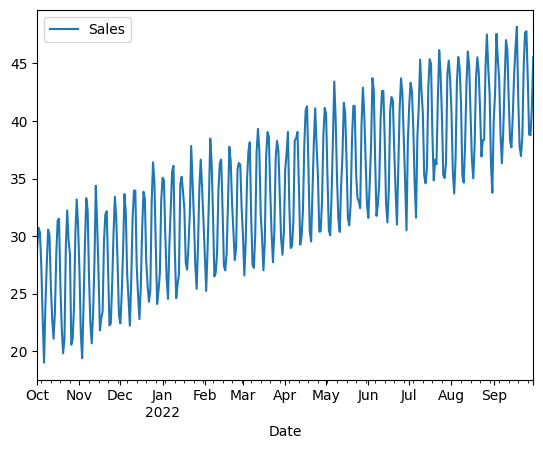

In [7]:
sales.plot(kind='line')

In [8]:
sales

,Sales
Date,
2021-10-01,29.109547
2021-10-02,30.720435
2021-10-03,30.305173
2021-10-04,27.390893
2021-10-05,22.841123
...,...
2022-09-26,43.698457
2022-09-27,38.827336
2022-09-28,38.761570


TEST FOR STATIONARITY

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['Adfuller Test', 'P-Value', '#Lags Used', 'Number of Observation used']
    for value, label  in zip(result,labels):
        print(label+' : '+ str(value))
    if result[1] <= 0.05:
        print("Reject the Null Hypothesis(HO).Hence, Time Series is Stationary")
    else:
        print('Weak Evidence against Null Hypothesis. Time Series is not Stationary')

In [11]:
adfuller_test(sales['Sales'])

Adfuller Test : 0.3404553171852645
P-Value : 0.9791262941384585
#Lags Used : 16
Number of Observation used : 348
Weak Evidence against Null Hypothesis. Time Series is not Stationary


DIFFERENCING

In [12]:
sales['sales_day_difference'] = sales['Sales'] - sales['Sales'].shift(1)
sales['sales_one_month_diff'] = sales['Sales'] - sales['Sales'].shift(30)
sales['sales_two_months_diff'] = sales['Sales'] - sales['Sales'].shift(60)


In [13]:
sales

,Sales,sales_day_difference,sales_one_month_diff,sales_two_months_diff
Date,,,,
2021-10-01,29.109547,NaN,NaN,NaN
2021-10-02,30.720435,1.610889,NaN,NaN
2021-10-03,30.305173,-0.415262,NaN,NaN
2021-10-04,27.390893,-2.914280,NaN,NaN
2021-10-05,22.841123,-4.549770,NaN,NaN
...,...,...,...,...
2022-09-26,43.698457,-4.098336,-3.819009,7.350478
2022-09-27,38.827336,-4.871121,-5.760154,-5.226289
2022-09-28,38.761570,-0.065766,-3.611683,-6.490544


In [14]:
#dickey fuller test on the one & two months differences
adfuller_test(sales['sales_one_month_diff'].dropna())

Adfuller Test : -3.987156092175409
P-Value : 0.0014792792872830812
#Lags Used : 16
Number of Observation used : 318
Reject the Null Hypothesis(HO).Hence, Time Series is Stationary


In [15]:
adfuller_test(sales['sales_two_months_diff'].dropna())

Adfuller Test : -3.6975533452893328
P-Value : 0.00414770044036586
#Lags Used : 16
Number of Observation used : 288
Reject the Null Hypothesis(HO).Hence, Time Series is Stationary


In [16]:
adfuller_test(sales['sales_day_difference'].dropna())

Adfuller Test : -6.582581181002734
P-Value : 7.450221855286864e-09
#Lags Used : 17
Number of Observation used : 346
Reject the Null Hypothesis(HO).Hence, Time Series is Stationary


<Axes: xlabel='Date'>

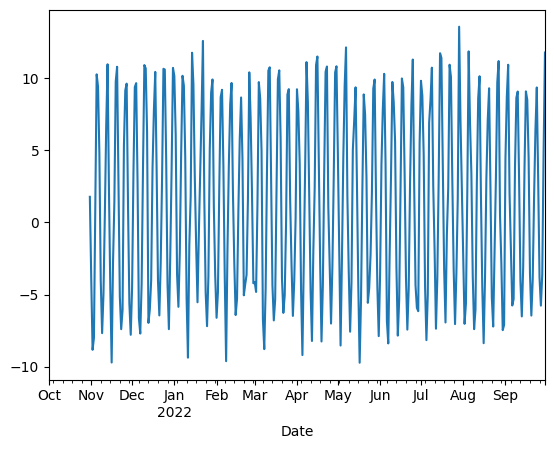

In [17]:
sales['sales_one_month_diff'].plot()

<Axes: xlabel='Date'>

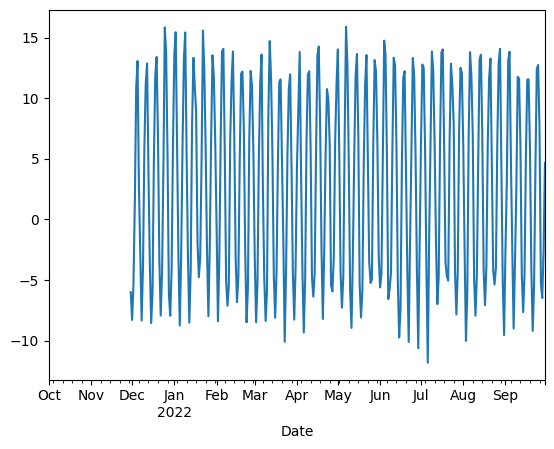

In [18]:
sales['sales_two_months_diff'].plot()

AUTO REGRESSIVE MODEL

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0.5, 1.0, 'One Month ACF')

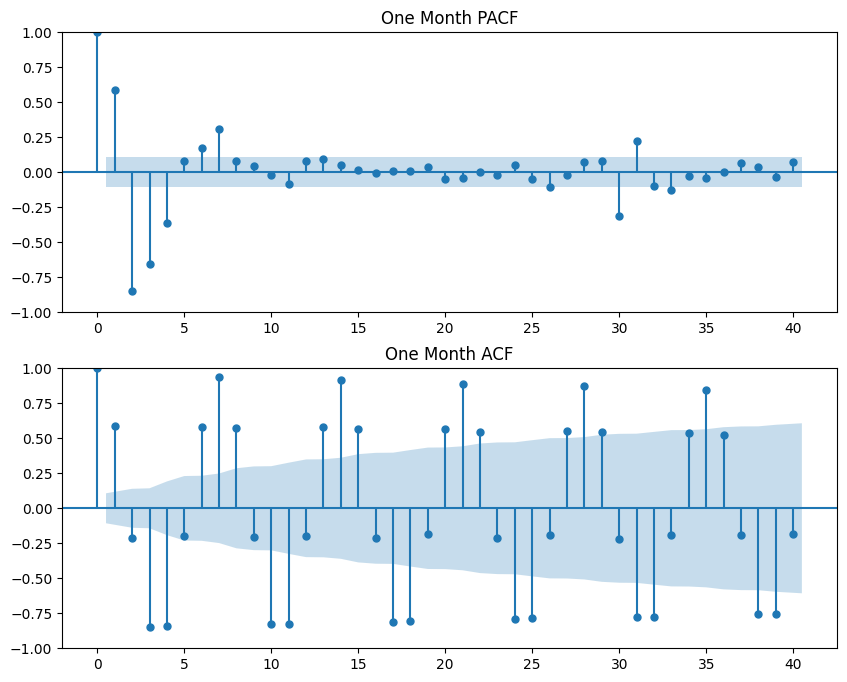

In [20]:
#using Partial Autocorrelation.PACF for AR Models
#Using Autocorrelation.ACF for MA Models

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = plot_pacf(sales['sales_one_month_diff'].dropna(), lags=40, ax=ax1)
ax1.set_title('One Month PACF')
ax2 = fig.add_subplot(212)
fig = plot_acf(sales['sales_one_month_diff'].dropna(), lags=40, ax=ax2)
ax2.set_title('One Month ACF')

Text(0.5, 1.0, 'Two Months ACF')

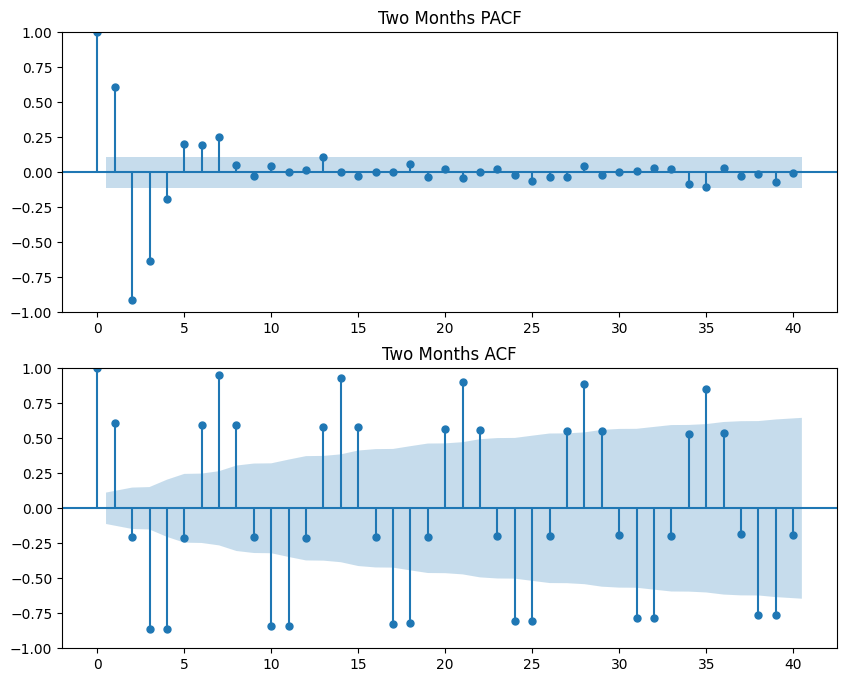

In [21]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = plot_pacf(sales['sales_two_months_diff'].dropna(), lags=40, ax=ax1)
ax1.set_title('Two Months PACF')
ax2 = fig.add_subplot(212)
fig = plot_acf(sales['sales_two_months_diff'].dropna(), lags=40, ax=ax2)
ax2.set_title('Two Months ACF')

In [22]:
#The ACF shows more of a likely part of exponetial Decay.
#Therefore, for Two_Months Differencing MA(q) = 0, AR(P) = 5/7 and D = 2

In [23]:
import statsmodels.api as sm

In [24]:
from statsmodels.tsa.arima.model import ARIMA #for non-seasonal 

In [25]:
model = ARIMA(sales['Sales'], order=(7,2,0))

C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [26]:
model_fit = model.fit()

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  365
Model:                 ARIMA(7, 2, 0)   Log Likelihood                -619.281
Date:                Fri, 20 Sep 2024   AIC                           1254.562
Time:                        21:05:55   BIC                           1285.717
Sample:                    10-01-2021   HQIC                          1266.946
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3773      0.045    -30.409      0.000      -1.466      -1.288
ar.L2         -1.3691      0.056    -24.497      0.000      -1.479      -1.260
ar.L3         -1.3499      0.053    -25.437      0.000      -1.454      -1.246
ar.L4         -1.4561      0.041    -35.199      0.000      -1.537      -1.375
ar.L5         -1.4503      0.051    -28.442      0.000      -1.550      -1.350
ar.L6         -1.1884      0.056    -21.105      0.000      -1.299      -1.078
ar.L7         -0.5468      0.045    -12.210      0.000      -0.635      -0.459
sigma2         1.7239      0.140     12.281      0.000       1.449       1.999
===================================================================================
Ljung-Box (L1) (Q):                  13.25   Jarque-Bera (JB):                 4.67
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               1.08   Skew:                             0.23
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
sales['forecast'] = model_fit.predict(start=270, end=365, dynamic=True)

<Axes: xlabel='Date'>

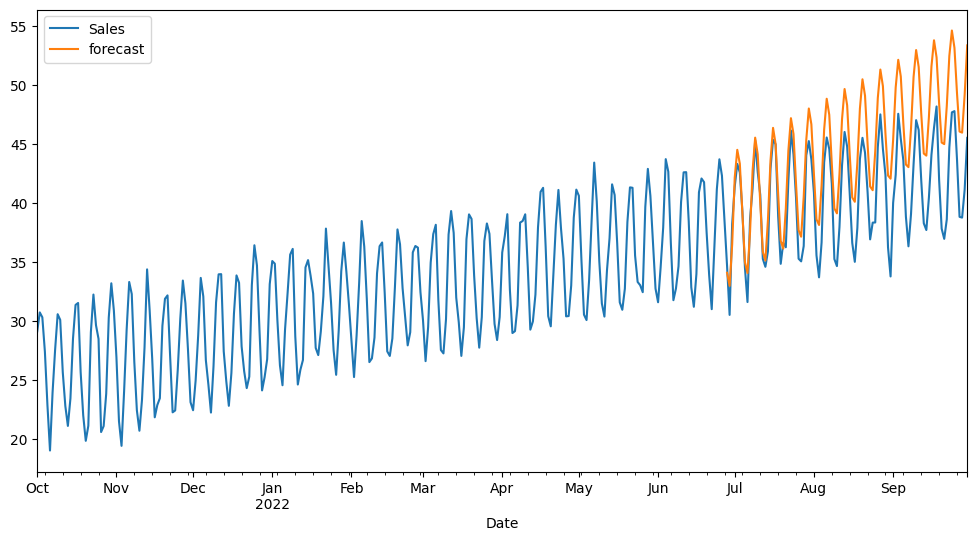

In [29]:
sales[['Sales', 'forecast']].plot(figsize=(12,6))

FORECASTING

In [34]:
from pandas.tseries.offsets import DateOffset

In [35]:
future_dates = [sales.index[-1] + DateOffset(days=x) for x in range(0,60)]

In [36]:
future_dates

[Timestamp('2022-09-30 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-10-02 00:00:00'),
 Timestamp('2022-10-03 00:00:00'),
 Timestamp('2022-10-04 00:00:00'),
 Timestamp('2022-10-05 00:00:00'),
 Timestamp('2022-10-06 00:00:00'),
 Timestamp('2022-10-07 00:00:00'),
 Timestamp('2022-10-08 00:00:00'),
 Timestamp('2022-10-09 00:00:00'),
 Timestamp('2022-10-10 00:00:00'),
 Timestamp('2022-10-11 00:00:00'),
 Timestamp('2022-10-12 00:00:00'),
 Timestamp('2022-10-13 00:00:00'),
 Timestamp('2022-10-14 00:00:00'),
 Timestamp('2022-10-15 00:00:00'),
 Timestamp('2022-10-16 00:00:00'),
 Timestamp('2022-10-17 00:00:00'),
 Timestamp('2022-10-18 00:00:00'),
 Timestamp('2022-10-19 00:00:00'),
 Timestamp('2022-10-20 00:00:00'),
 Timestamp('2022-10-21 00:00:00'),
 Timestamp('2022-10-22 00:00:00'),
 Timestamp('2022-10-23 00:00:00'),
 Timestamp('2022-10-24 00:00:00'),
 Timestamp('2022-10-25 00:00:00'),
 Timestamp('2022-10-26 00:00:00'),
 Timestamp('2022-10-27 00:00:00'),
 Timestamp('2022-10-

In [37]:
future_df = pd.DataFrame(index=future_dates[1:], columns = sales.columns)

In [38]:
future_df

,Sales,sales_day_difference,sales_one_month_diff,sales_two_months_diff,forecast
2022-10-01,NaN,NaN,NaN,NaN,NaN
2022-10-02,NaN,NaN,NaN,NaN,NaN
2022-10-03,NaN,NaN,NaN,NaN,NaN
2022-10-04,NaN,NaN,NaN,NaN,NaN
2022-10-05,NaN,NaN,NaN,NaN,NaN
2022-10-06,NaN,NaN,NaN,NaN,NaN
2022-10-07,NaN,NaN,NaN,NaN,NaN
2022-10-08,NaN,NaN,NaN,NaN,NaN
2022-10-09,NaN,NaN,NaN,NaN,NaN
2022-10-10,NaN,NaN,NaN,NaN,NaN


In [39]:
future_df = pd.concat([sales, future_df])

C:\Users\Hp Pc\AppData\Local\Temp\ipykernel_5956\334575817.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([sales, future_df])


In [40]:
future_df.tail(15)

,Sales,sales_day_difference,sales_one_month_diff,sales_two_months_diff,forecast
2022-11-14,NaN,NaN,NaN,NaN,NaN
2022-11-15,NaN,NaN,NaN,NaN,NaN
2022-11-16,NaN,NaN,NaN,NaN,NaN
2022-11-17,NaN,NaN,NaN,NaN,NaN
2022-11-18,NaN,NaN,NaN,NaN,NaN
2022-11-19,NaN,NaN,NaN,NaN,NaN
2022-11-20,NaN,NaN,NaN,NaN,NaN
2022-11-21,NaN,NaN,NaN,NaN,NaN
2022-11-22,NaN,NaN,NaN,NaN,NaN
2022-11-23,NaN,NaN,NaN,NaN,NaN


<Axes: >

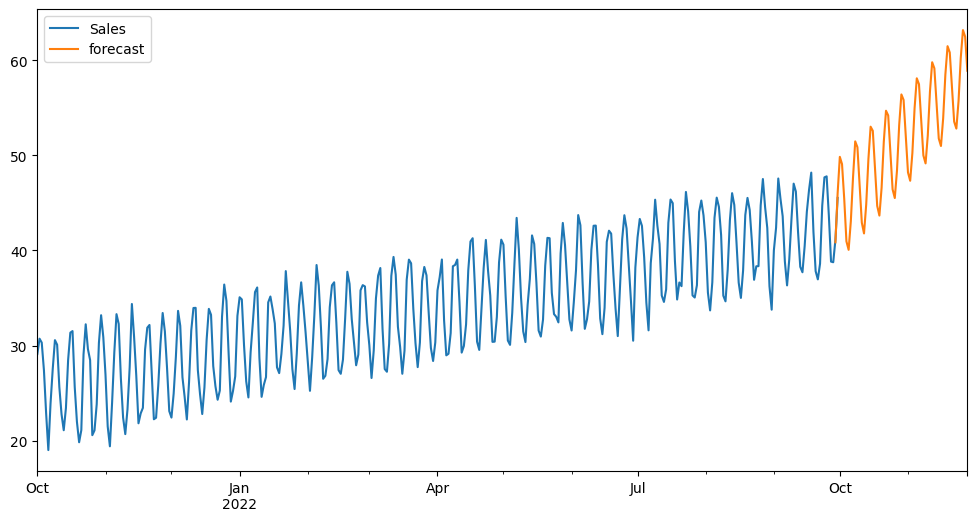

In [43]:
future_df['forecast'] = model_fit.predict(start=363, end=425, dynamic=True)
future_df[['Sales', 'forecast']].plot(figsize=(12,6))